In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import prepare as p

In [69]:
df = p.wrangle_store_data()

In [70]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


In [195]:
train = df[:'2015']
validate = df['2016']
test = df['2017']

In [196]:
df.shape, train.shape, validate.shape, test.shape

((913000, 16), (547500, 16), (183000, 16), (182500, 16))

In [36]:
# lets look at sales by store by month
store_month = train.groupby('store_id').resample('M').sales_total.sum().unstack()

In [30]:
store_month

sale_date,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,...,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31
store_id,,,,,,,,,,,,,,,,,,,,,
1,221774.22,222459.82,299616.28,330095.43,373023.05,384018.40,415542.90,375686.81,335169.11,317408.92,...,385080.14,439687.99,480555.66,495204.90,552746.12,475897.58,437250.15,421119.62,433825.40,321373.07
2,313859.06,318672.05,427780.05,473620.81,529055.80,548474.29,589500.91,527701.65,476945.55,451275.62,...,545088.41,621370.34,680322.67,708000.10,786419.15,676434.66,618766.56,596386.42,616096.49,452869.95
3,279675.72,280075.17,376721.28,417203.04,464730.49,488456.74,523413.57,471261.39,422492.88,401293.34,...,487446.00,557669.63,606834.55,627466.76,697970.39,603398.76,549844.93,526442.50,542766.25,401758.20
4,257215.76,263483.88,347948.19,385533.57,433174.05,450291.66,484097.16,432604.32,388224.32,371091.21,...,444207.61,509294.08,560037.97,577182.72,644984.00,553252.77,506510.74,485256.99,504902.98,370745.18
5,185404.16,187200.64,252857.86,280171.85,310778.72,326904.41,348890.70,314224.64,282925.47,269142.24,...,325315.17,367773.98,406070.11,418338.13,465295.89,401168.94,365670.24,355979.18,366627.25,268857.62
6,187900.56,187615.24,253601.22,278147.80,310239.70,327240.05,349273.29,315390.97,283387.82,269773.94,...,322997.00,372506.24,403174.59,417298.30,465781.15,400363.05,365500.74,352378.32,362151.10,270628.50
7,170486.02,171819.63,231261.55,254220.30,284084.11,297541.74,320944.08,287151.38,257642.15,247970.02,...,295689.28,335614.03,369701.93,382723.72,423546.84,364047.95,336880.84,322112.46,336771.76,246714.15
8,301499.88,302451.39,408845.78,448431.47,504747.63,526484.49,564502.79,504896.40,455534.68,435625.75,...,520662.54,591183.88,653650.14,671820.08,749725.70,650276.03,589802.83,570606.30,587279.32,435556.47
9,255608.94,258859.02,349478.69,386475.10,429412.84,448926.16,485081.99,434354.83,391649.01,371218.20,...,446828.05,511498.29,560044.99,580322.55,646444.13,555973.98,508836.76,488961.64,504613.47,370140.21


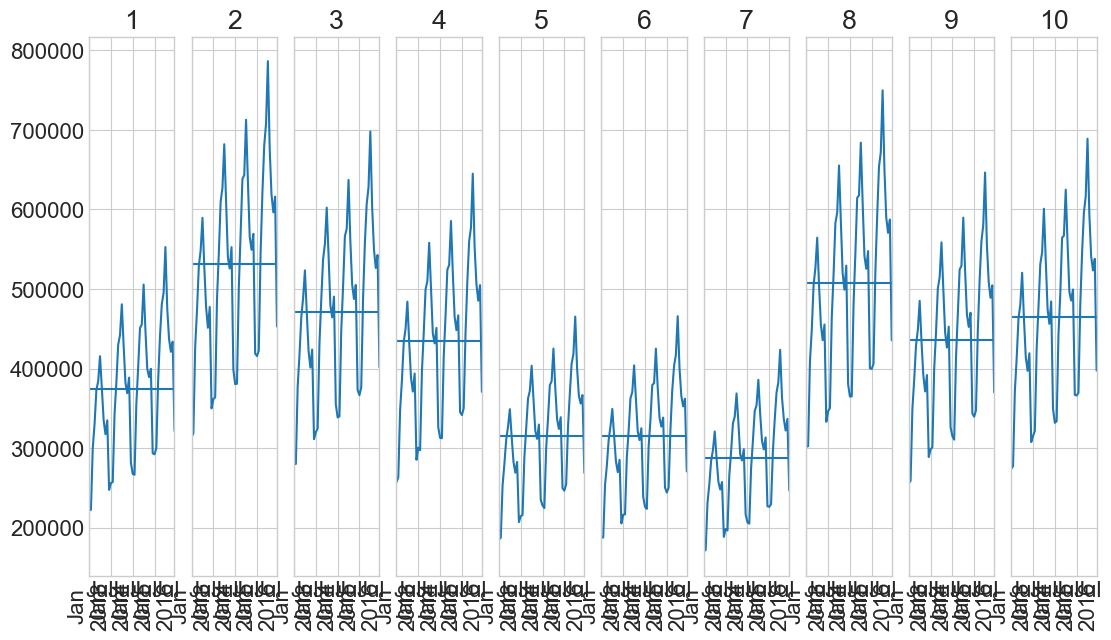

In [32]:
fig, axs = plt.subplots(1, 10, sharey=True, sharex=True)
for ax, (store_id, subset) in zip(axs, store_month.iterrows()):
    subset.plot(ax=ax, title=store_id)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.tick_params('x', rotation=90)

In [35]:
# lets look at sales by store by year
store_year = train.groupby('store_id').resample('Y').sales_total.sum().unstack()

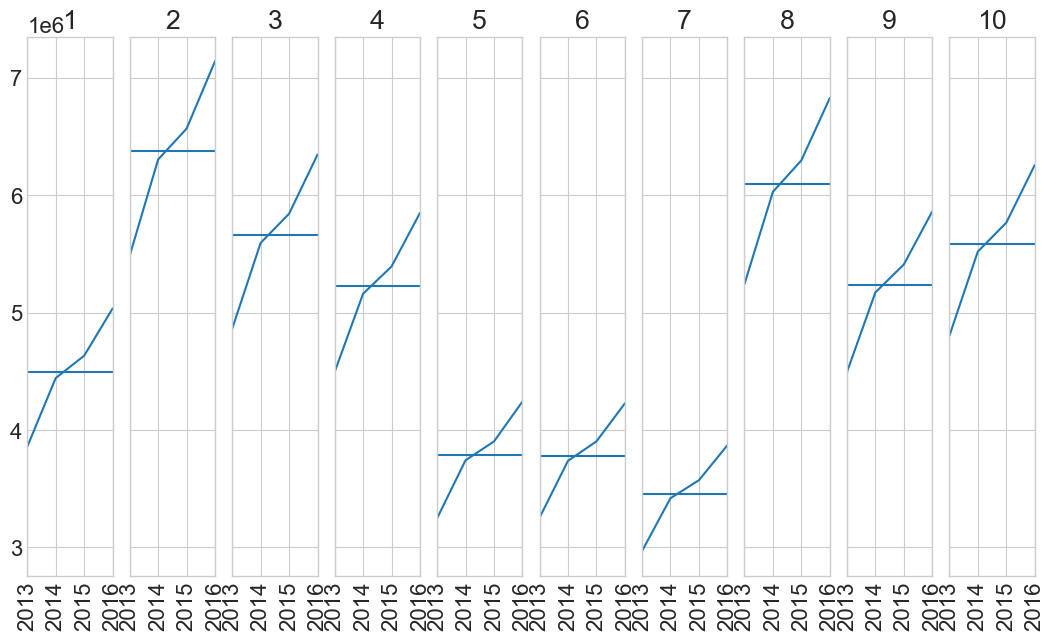

In [37]:
fig, axs = plt.subplots(1, 10, sharey=True, sharex=True)
for ax, (store_id, subset) in zip(axs, store_year.iterrows()):
    subset.plot(ax=ax, title=store_id)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.tick_params('x', rotation=90)

In [56]:
train.groupby([train.index.month, train.store_id]).sales_total.sum().unstack()

store_id,1,2,3,4,5,6,7,8,9,10
sale_date,,,,,,,,,,
1,1037700.77,1471515.68,1304988.40,1212170.08,874258.26,874488.07,801656.93,1412220.15,1208554.59,1286881.28
2,1045918.92,1485684.82,1320608.90,1223216.44,882152.75,878147.76,802886.93,1423988.61,1218043.55,1301948.66
3,1382532.79,1961475.01,1744251.73,1602661.80,1166751.57,1166840.24,1067068.08,1874032.91,1610520.80,1718915.35
4,1553206.66,2209538.06,1965084.43,1805506.04,1309363.06,1308370.48,1194551.87,2101869.80,1811737.57,1928606.84
5,1734362.27,2457154.17,2175497.98,2016899.93,1457915.72,1455416.40,1331521.35,2355752.26,2014651.86,2154654.14
6,1776542.22,2527012.77,2248230.62,2067378.31,1501465.84,1496598.88,1373500.42,2412149.59,2073042.08,2209984.18
7,1954641.69,2770611.89,2460808.94,2272709.60,1642838.95,1644085.20,1499008.18,2653352.29,2279825.46,2435033.15
8,1728908.99,2450290.96,2178368.55,2007516.32,1454111.13,1453766.97,1326717.84,2350249.43,2014467.39,2151440.71
9,1554454.53,2200832.50,1957482.95,1803802.67,1307083.61,1307723.34,1195777.72,2106594.69,1814226.86,1927178.03


In [206]:
train.groupby([train.index.day, train.store_id]).sales_total.mean().unstack()

store_id,1,2,3,4,5,6,7,8,9,10
sale_date,,,,,,,,,,
1,235.741372,335.974100,296.112911,273.981772,197.169294,198.612967,182.072878,320.085894,274.073567,293.613417
2,235.247928,335.486189,295.588217,273.590978,196.299917,197.010672,180.188939,318.301083,271.897589,293.096656
3,233.707867,332.275339,294.923161,274.100183,196.371256,197.356500,179.695483,316.618111,272.658844,291.928889
4,236.445572,332.663367,296.156100,272.187644,198.183911,197.887572,180.922456,320.125200,274.647028,293.172406
5,237.075628,338.948339,301.032956,277.343000,199.899083,200.212967,185.124200,323.055972,278.758367,296.422017
6,239.344761,338.730472,300.536550,278.292544,200.123861,199.577672,184.649461,324.161911,276.220639,295.165711
7,233.417850,334.751556,296.321256,273.339850,199.591150,199.339489,181.765117,320.598306,274.595106,295.628711
8,237.212867,334.655372,297.295917,275.130539,199.464517,199.752489,183.281928,320.657489,273.843894,293.738706
9,232.962067,331.842228,293.902939,270.657994,197.995533,198.005206,179.848750,317.227083,271.897672,291.700128


In [210]:
train.groupby(train.store_id).resample('D').sales_total.mean().unstack()

sale_date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31
store_id,,,,,,,,,,,,,,,,,,,,,
1,144.2718,135.6188,141.7810,158.4622,161.6882,171.2850,111.4116,131.6672,134.2310,145.6900,...,174.3648,171.0504,197.1796,204.9104,219.1584,228.3572,145.0744,176.5806,176.4620,190.5494
2,191.0888,193.9210,205.0146,215.6880,227.2490,236.0384,159.8438,194.6286,191.5268,210.1566,...,254.3590,248.6400,269.4612,273.1594,308.3070,320.1704,208.8972,254.7170,250.0526,262.6134
3,168.8902,167.8828,175.6218,188.3566,203.1346,211.0556,137.9780,164.1906,181.1138,184.5424,...,220.3786,227.1490,242.0146,261.3742,278.1632,275.3832,191.9408,217.6982,226.5262,231.7872
4,154.6072,155.3582,168.0368,183.3458,177.2866,209.4756,138.7242,153.8124,154.8720,159.8402,...,200.2884,207.6068,220.7932,237.9302,252.9474,256.7214,192.0706,205.4814,207.0134,226.8938
5,108.8416,107.7576,120.7246,134.1094,126.4960,136.4354,95.8234,107.3016,112.2994,126.2386,...,149.6306,141.6200,165.4098,163.0986,180.3924,189.3114,130.5222,146.1530,150.0428,161.1010
6,117.2816,109.0598,121.2700,126.1994,137.7362,149.4580,97.0026,107.1602,110.0148,127.7384,...,144.5764,145.9488,163.8698,172.0348,184.4884,200.5948,136.7972,147.1064,146.9610,158.5924
7,104.1810,101.1850,103.7528,113.9838,119.9018,130.4976,86.6374,101.8962,108.9670,106.1640,...,134.5002,136.9542,146.5548,161.5930,156.0420,178.4196,110.3320,130.3574,138.2732,145.4000
8,177.2106,181.3400,187.7658,209.4276,216.0970,221.2234,172.5690,178.2964,182.2286,185.0660,...,236.7476,238.2626,257.7964,262.6278,287.8540,311.4814,202.5606,254.8038,242.9982,256.2480
9,146.9136,153.3158,162.3672,173.4498,179.4924,190.7086,131.3388,154.4914,153.7354,166.2402,...,199.5694,201.6284,215.7334,247.4036,261.5082,262.4706,171.9136,220.9906,195.3260,212.0184


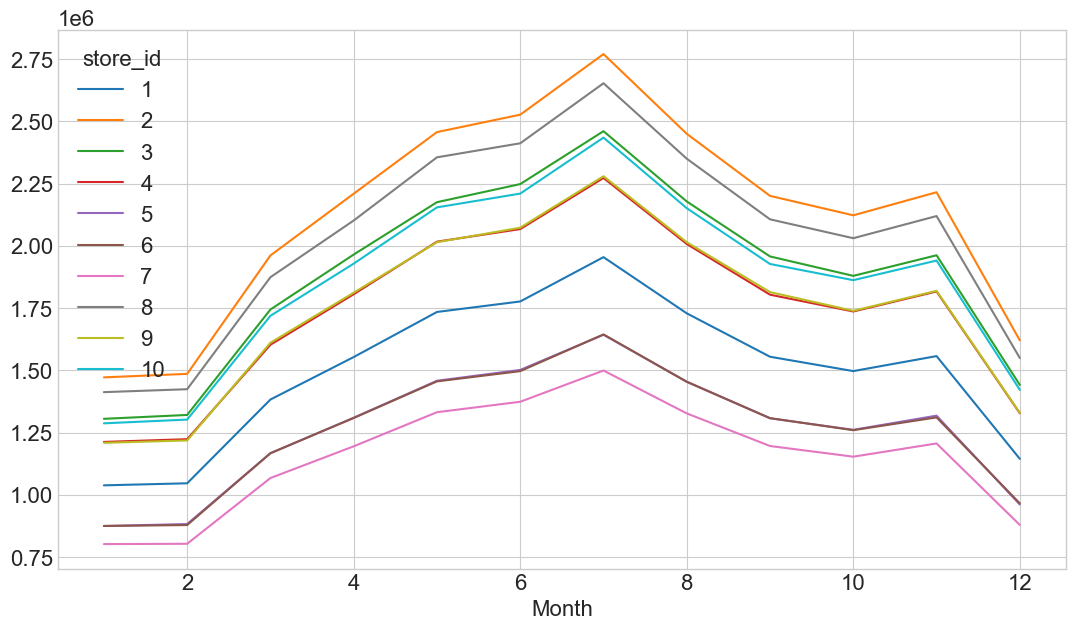

In [55]:
train.groupby([train.index.month, train.store_id]).sales_total.sum().unstack().plot()
plt.xlabel('Month')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

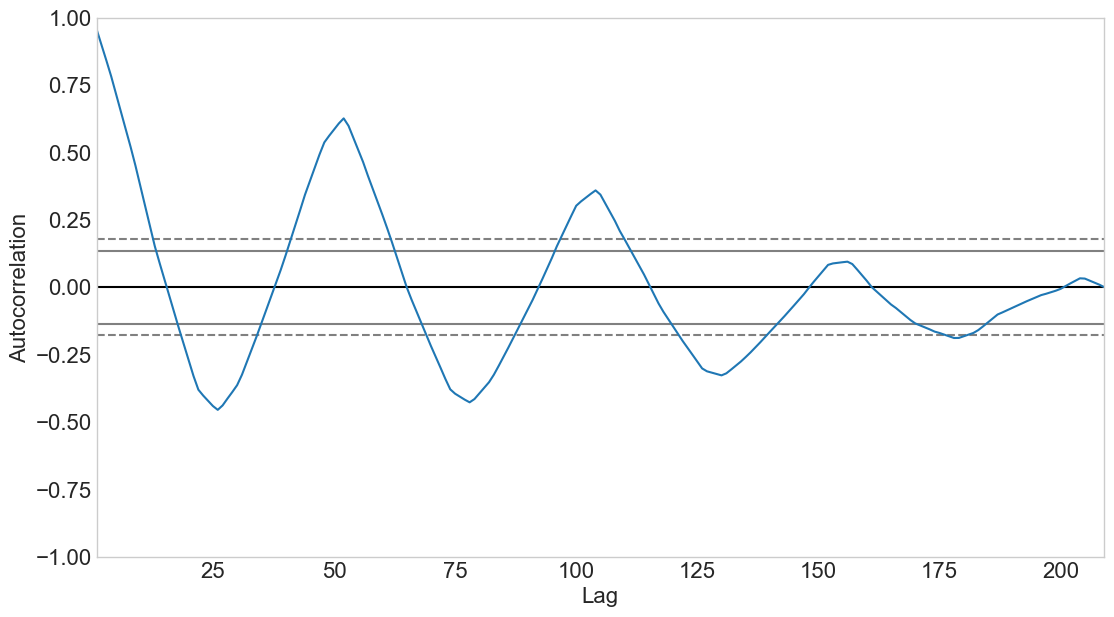

In [59]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [60]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


<AxesSubplot:xlabel='sale_date'>

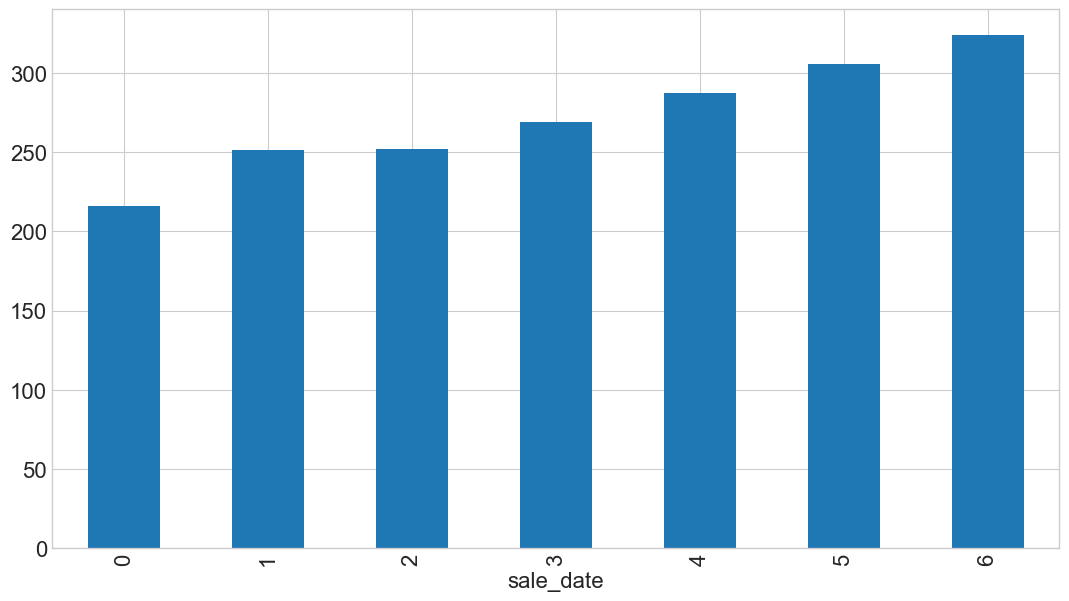

In [66]:
train.groupby(train.index.day_of_week).sales_total.mean().plot.bar()

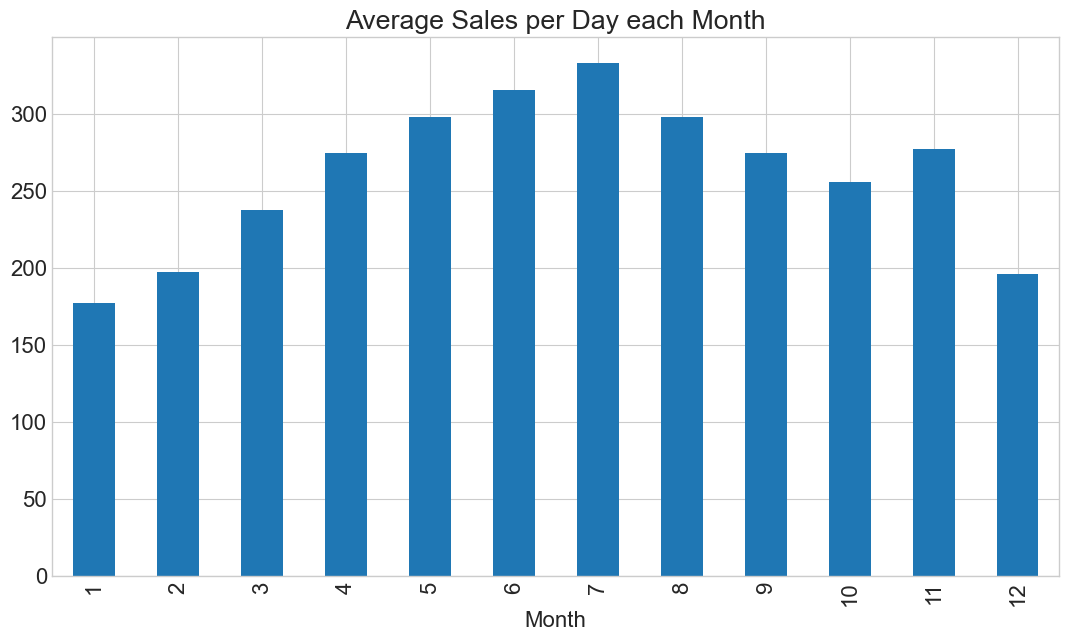

In [218]:
train.groupby(train.index.month).sales_total.mean().plot.bar(xlabel='Month')
plt.title('Average Sales per Day each Month');

In [222]:
# plt.plot(store.index, store.sales_total)

In [201]:
store_1 = train[train.store_id == 1]

In [103]:
store_1

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,1,26,300436344045,300436344045,Triaminic,Triaminic Syrup Night Time Cold & Cough Grape 4oz,0.98,456501,16,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,15.68
2013-01-01,1,27,24600017008,24600017008,Morton,Morton Kosher Salt Coarse,6.01,474761,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,84.14
2013-01-01,1,28,719175900007,719175900007,Usda Produce,Guava,7.52,493021,49,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,368.48
2013-01-01,1,29,13000001038,13000001038,Heinz,Heinz Tomato Ketchup - 2 Ct,8.65,511281,34,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,294.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31,1,6,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,92761,53,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,367.29
2016-12-31,1,3,23923330139,23923330139,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,37981,29,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,70.47
2016-12-31,1,22,16000288829,16000288829,Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,384921,58,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,423.98


In [104]:
store_1[store_1.sales_total <= 1]

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,


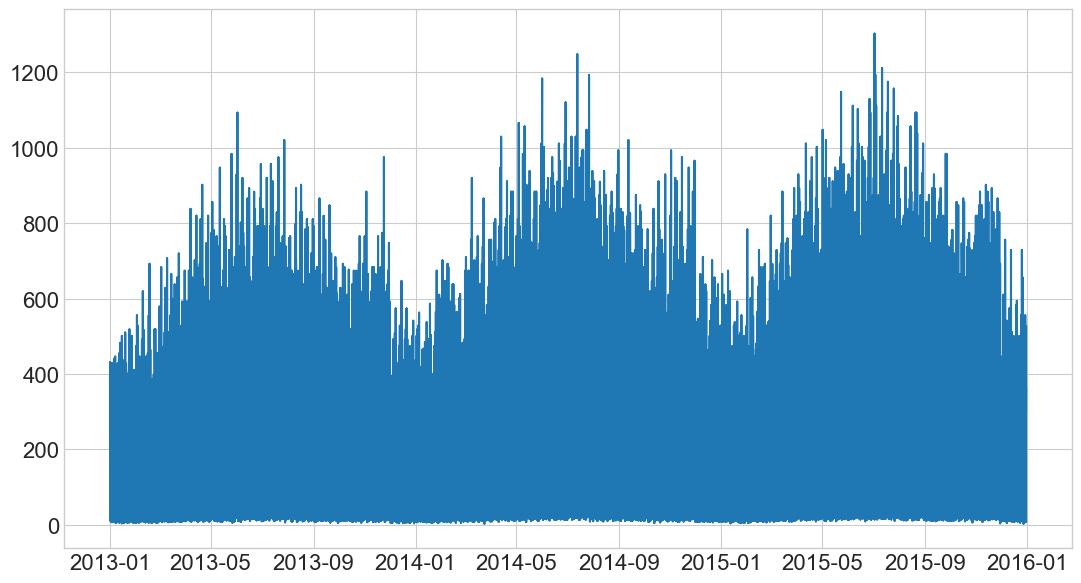

In [202]:
plt.plot(store_1.index, store_1.sales_total)

<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

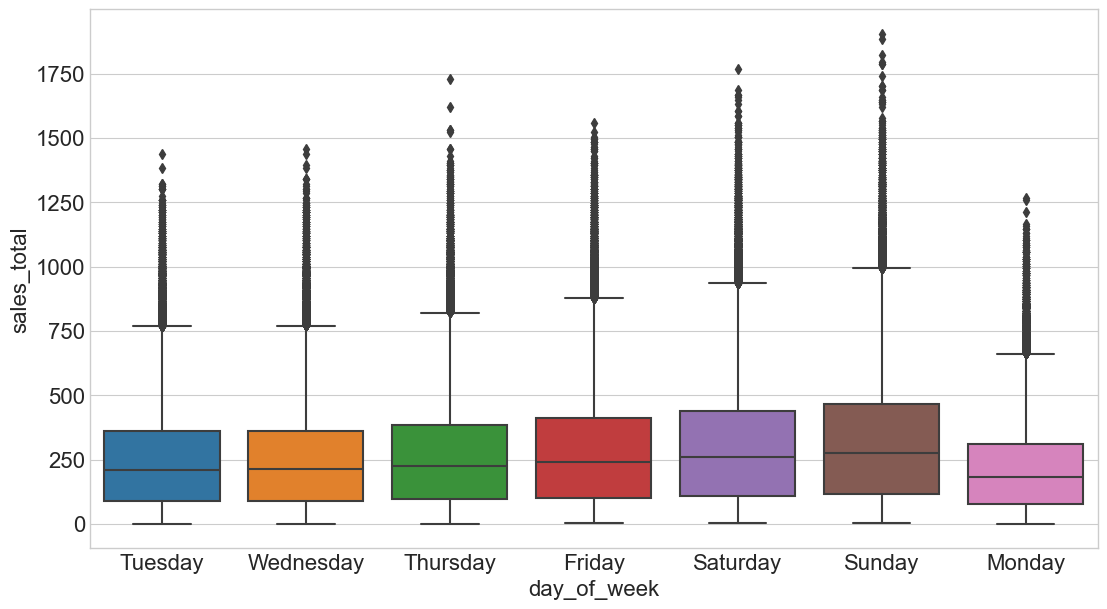

In [106]:
sns.boxplot(data=train, x='day_of_week', y='sales_total')

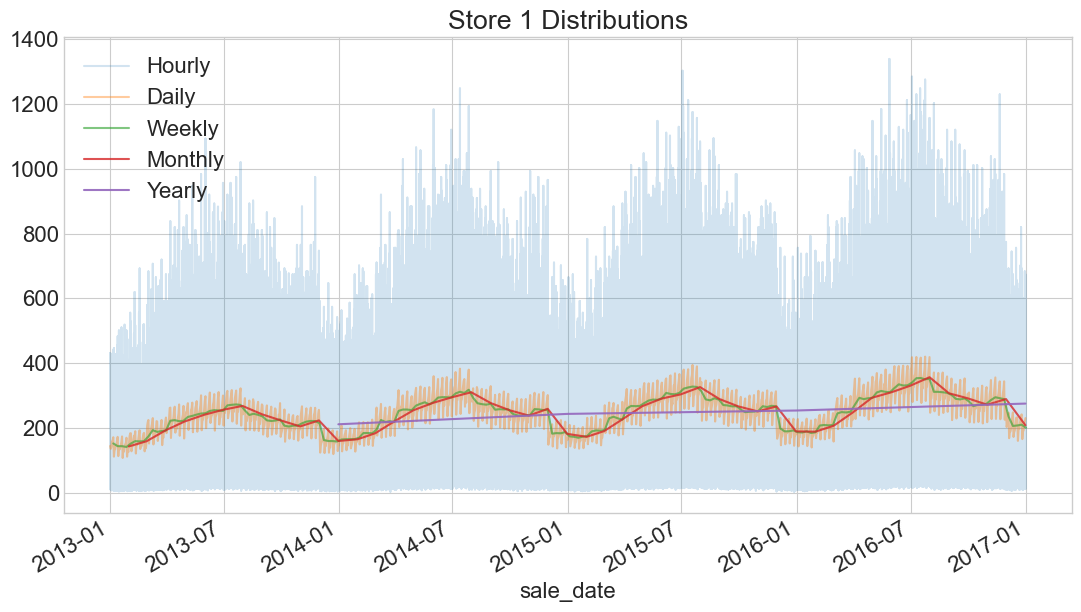

In [110]:
store_1.sales_total.plot(alpha=0.2, label='Hourly')
store_1.resample('D').sales_total.mean().plot(alpha=0.4, label='Daily')
store_1.resample('W').sales_total.mean().plot(alpha=0.6, label='Weekly')
store_1.resample('M').sales_total.mean().plot(alpha=0.8, label='Monthly')
store_1.resample('Y').sales_total.mean().plot(alpha=0.9, label='Yearly')
plt.legend()
plt.title('Store 1 Distributions')
plt.show()

In [113]:
y = store_1.sales_total.resample('M').mean()
result = sm.tsa.seasonal_decompose(y)

In [114]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid})

In [115]:
decomposition

,y,trend,seasonal,residual
sale_date,,,,
2013-01-31,143.080142,NaN,-71.621791,NaN
2013-02-28,158.899871,NaN,-55.616354,NaN
2013-03-31,193.300826,NaN,-18.175102,NaN
2013-04-30,220.063620,NaN,18.867621,NaN
2013-05-31,240.660032,NaN,37.981173,NaN
2013-06-30,256.012267,NaN,53.079239,NaN
2013-07-31,268.092194,212.064015,65.129240,-9.101062
2013-08-31,242.378587,214.023911,31.815597,-3.460921
2013-09-30,223.446073,216.219960,9.188607,-1.962494


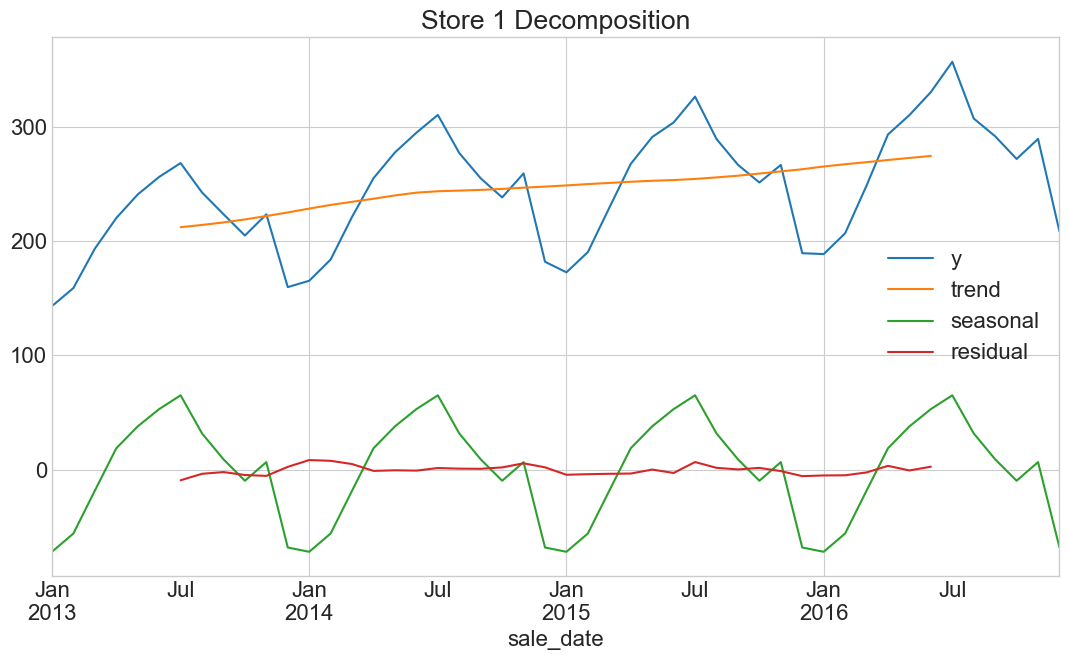

In [117]:
decomposition.plot()
plt.title('Store 1 Decomposition')
plt.show()

In [124]:
store_1

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,1,26,300436344045,300436344045,Triaminic,Triaminic Syrup Night Time Cold & Cough Grape 4oz,0.98,456501,16,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,15.68
2013-01-01,1,27,24600017008,24600017008,Morton,Morton Kosher Salt Coarse,6.01,474761,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,84.14
2013-01-01,1,28,719175900007,719175900007,Usda Produce,Guava,7.52,493021,49,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,368.48
2013-01-01,1,29,13000001038,13000001038,Heinz,Heinz Tomato Ketchup - 2 Ct,8.65,511281,34,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,294.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31,1,6,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,92761,53,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,367.29
2016-12-31,1,3,23923330139,23923330139,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,37981,29,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,70.47
2016-12-31,1,22,16000288829,16000288829,Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,384921,58,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,423.98


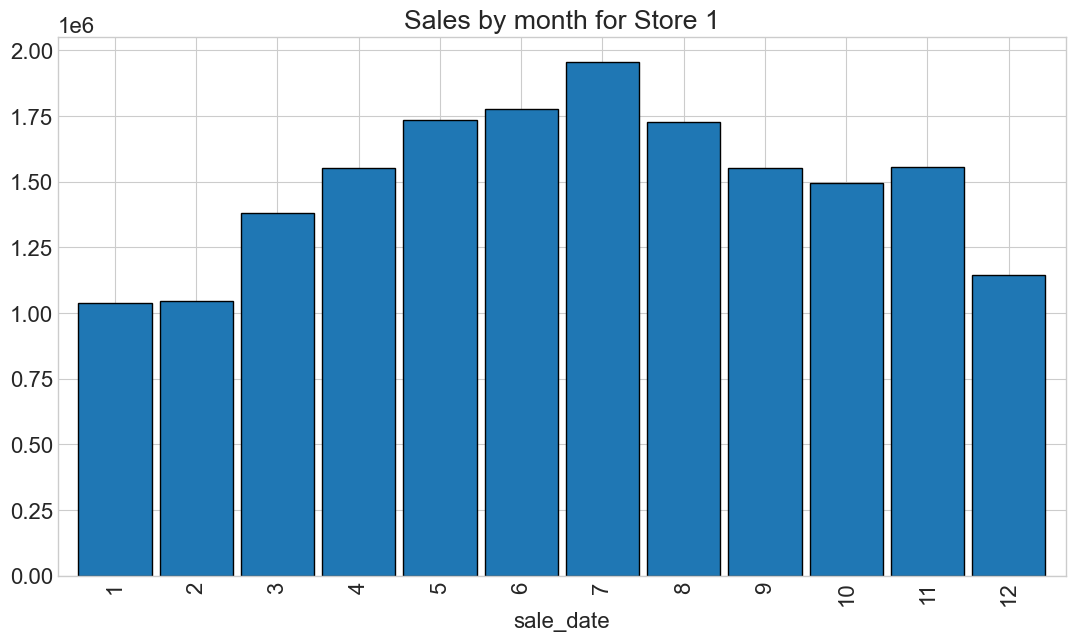

In [131]:
(store_1.groupby(store_1.index.month)
 .sales_total.sum()
 .plot.bar(stacked=True, width=.9, ec='black')
)
plt.title('Sales by month for Store 1')
plt.show()

In [149]:
product_sales = train.groupby('item_id').resample('W').sales_total.sum().unstack()

In [150]:
product_sales

sale_date,2013-01-06,2013-01-13,2013-01-20,2013-01-27,2013-02-03,2013-02-10,2013-02-17,2013-02-24,2013-03-03,2013-03-10,...,2016-10-30,2016-11-06,2016-11-13,2016-11-20,2016-11-27,2016-12-04,2016-12-11,2016-12-18,2016-12-25,2017-01-01
item_id,,,,,,,,,,,,,,,,,,,,,
1,673.68,724.92,726.60,671.16,801.36,785.40,795.48,807.24,920.64,992.88,...,1320.48,1473.36,1457.40,1404.48,1412.04,1262.52,1079.40,1035.72,1077.72,873.60
2,13311.48,15134.00,15629.88,14998.76,15546.16,16866.36,16943.64,16492.84,17909.64,19996.20,...,28458.36,29952.44,30268.00,30210.04,29907.36,25128.88,21651.28,21767.20,21934.64,17239.88
3,3059.37,3576.96,3528.36,3506.49,3608.55,4028.94,3895.29,4009.50,4369.14,4653.45,...,6682.50,7161.21,6930.36,7217.10,7156.35,5897.61,5146.74,4964.49,5003.37,4077.54
4,2304.76,2612.48,2722.38,2618.76,2907.64,2989.28,3108.60,3089.76,3450.86,3689.50,...,4845.02,5391.38,5856.10,5381.96,5391.38,4574.98,4088.28,3909.30,4078.86,2983.00
5,1547.73,1806.12,1829.61,1936.62,1978.38,2048.85,2116.71,2148.03,2221.11,2466.45,...,3513.06,3779.28,3862.80,3948.93,4016.79,3116.34,2884.05,2683.08,2456.01,2155.86
6,13638.24,15800.40,16001.37,15869.70,16832.97,17858.61,17588.34,18482.31,19764.36,21677.04,...,30242.52,32931.36,31926.51,32972.94,32099.76,26666.64,22813.56,23042.25,23416.47,17519.04
7,18769.08,22499.76,22904.64,21535.76,24408.48,24495.24,24880.84,24765.16,26635.32,30433.48,...,43032.96,43948.76,44777.80,45211.60,44816.36,36940.48,32409.68,32978.44,31802.36,25864.12
8,4421.76,5273.52,5162.64,5134.08,5507.04,5607.84,5530.56,5811.12,6182.40,6762.00,...,9707.04,10370.64,10340.40,10241.28,10244.64,8384.88,7481.04,7509.60,7274.40,5920.32
9,3030.47,3626.54,3751.84,3621.17,3946.95,4045.40,4181.44,4109.84,4467.84,4974.41,...,6580.04,7453.56,7304.99,7466.09,7362.27,6069.89,5128.35,5149.83,5350.31,4258.41


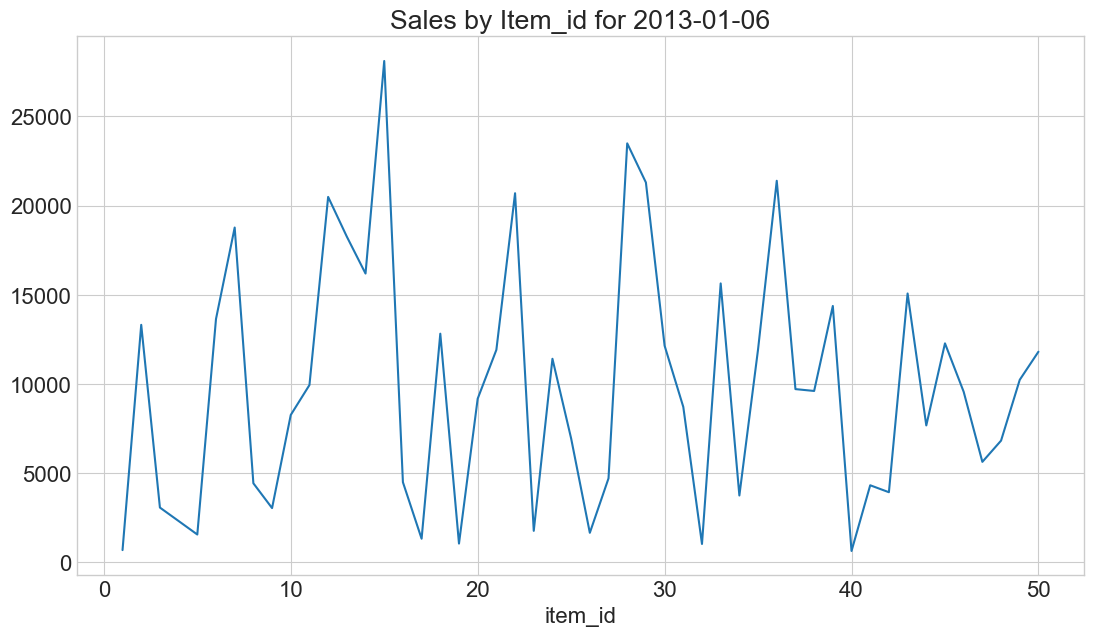

In [156]:
product_sales.loc[:,'2013-01-06'].plot()
plt.title('Sales by Item_id for 2013-01-06')
plt.show()

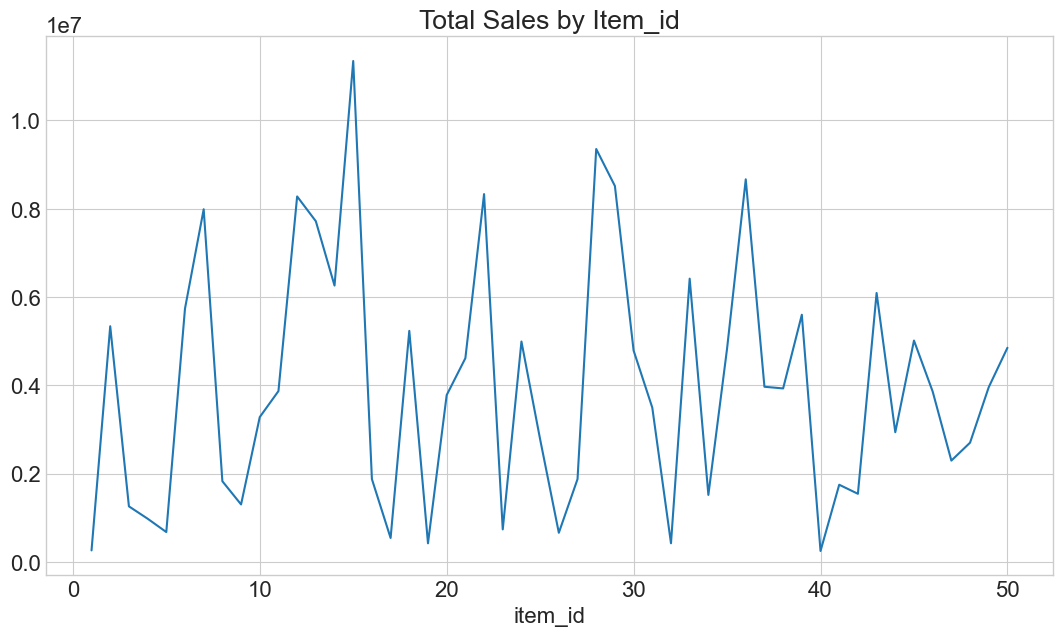

In [161]:
product_sales.sum(axis=1).plot()
plt.title('Total Sales by Item_id')
plt.show()

# Part 2

In [162]:
germany = p.wrangle_germany()

In [163]:
germany.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [165]:
train_ger, test_ger = p.split_time_data(germany)

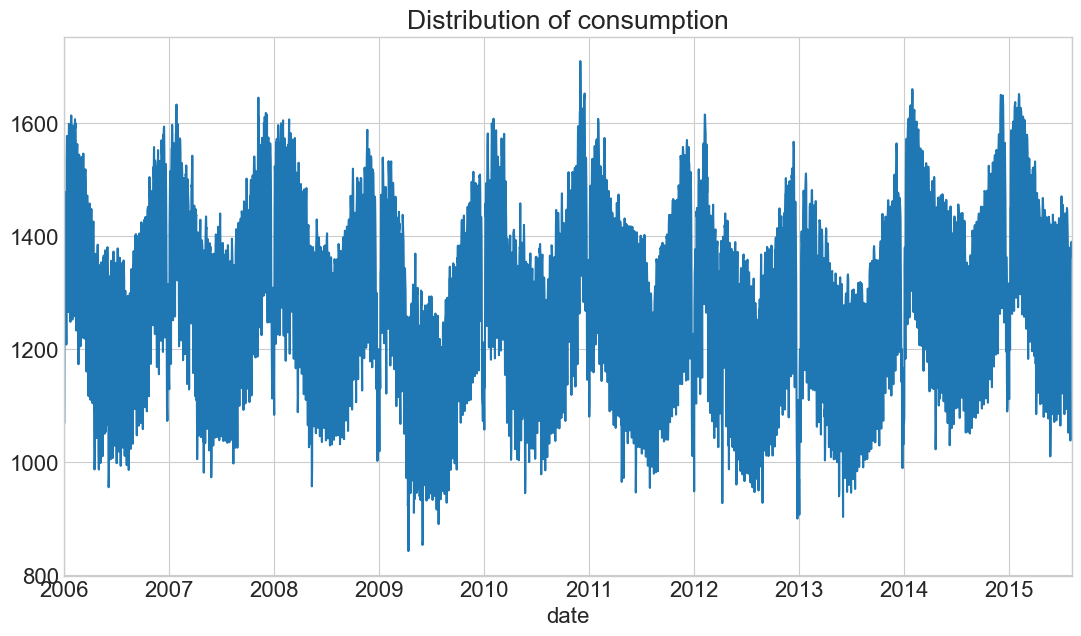

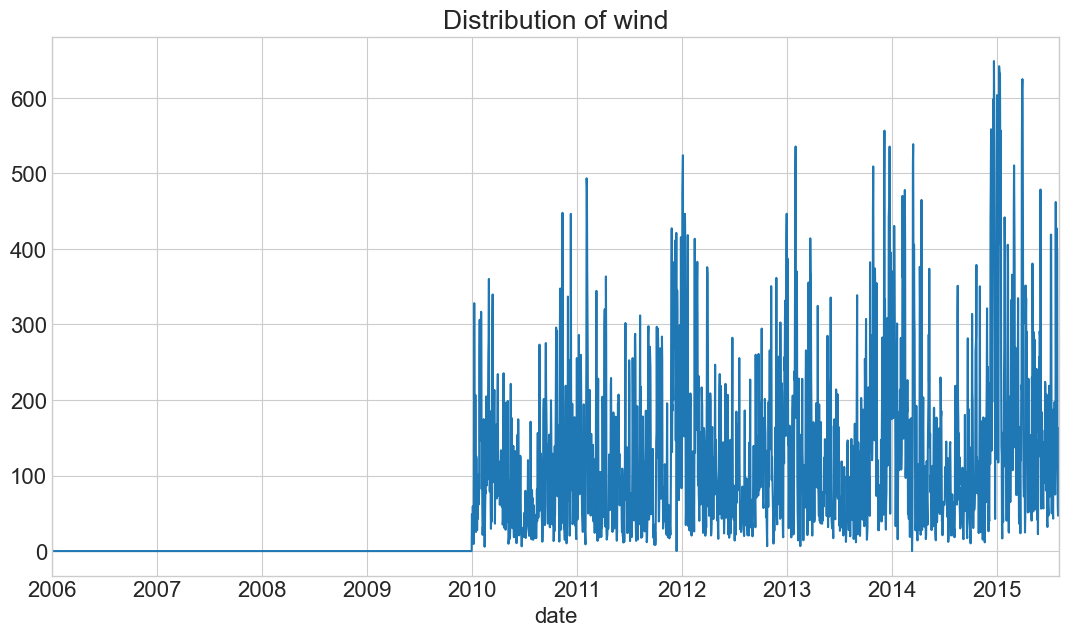

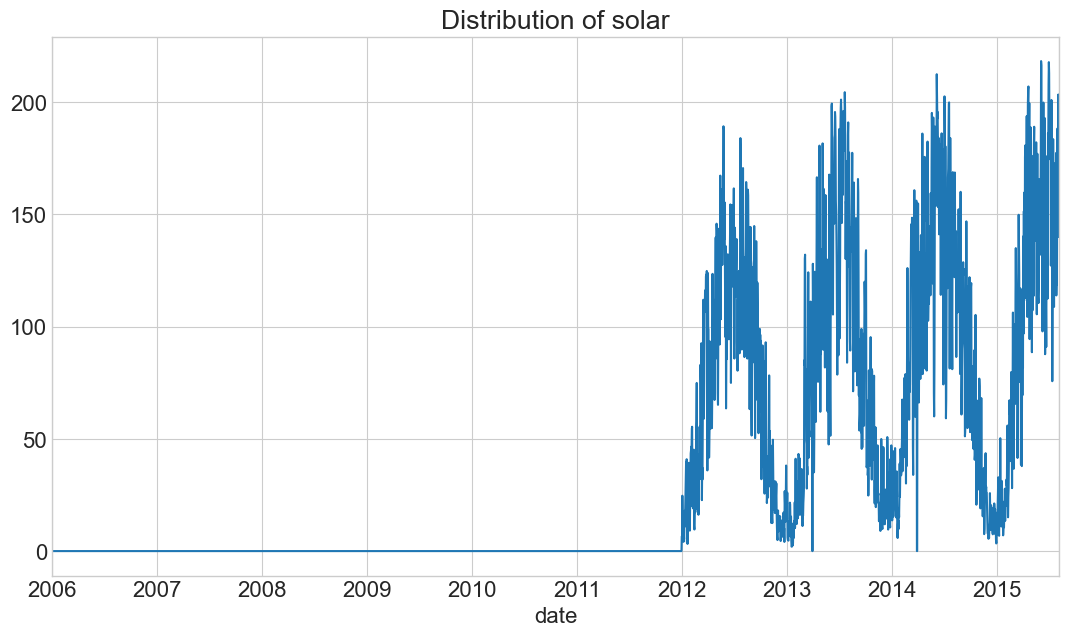

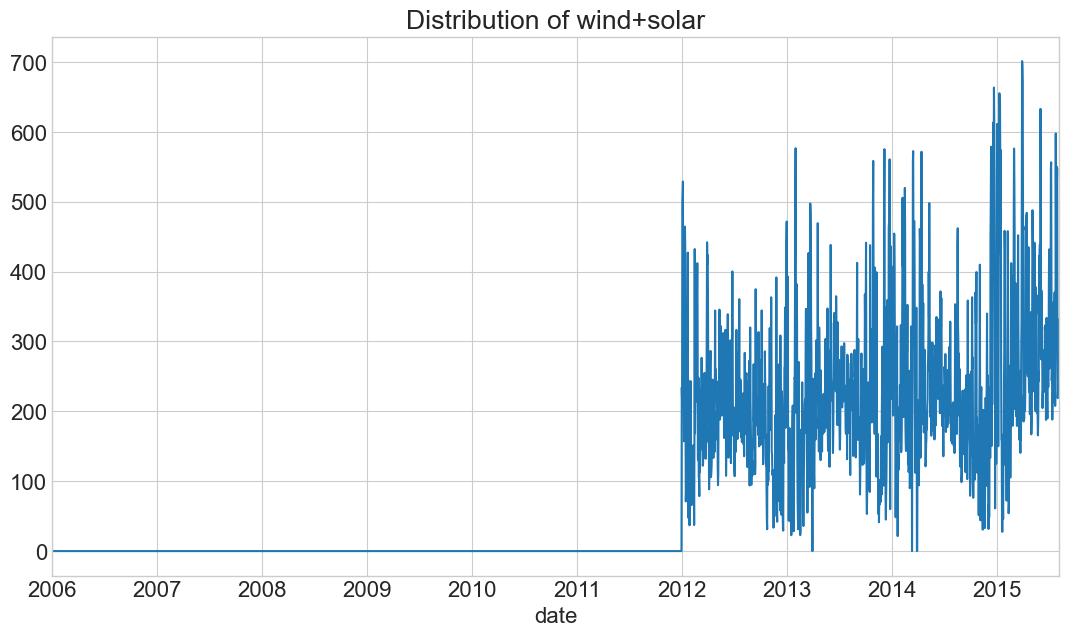

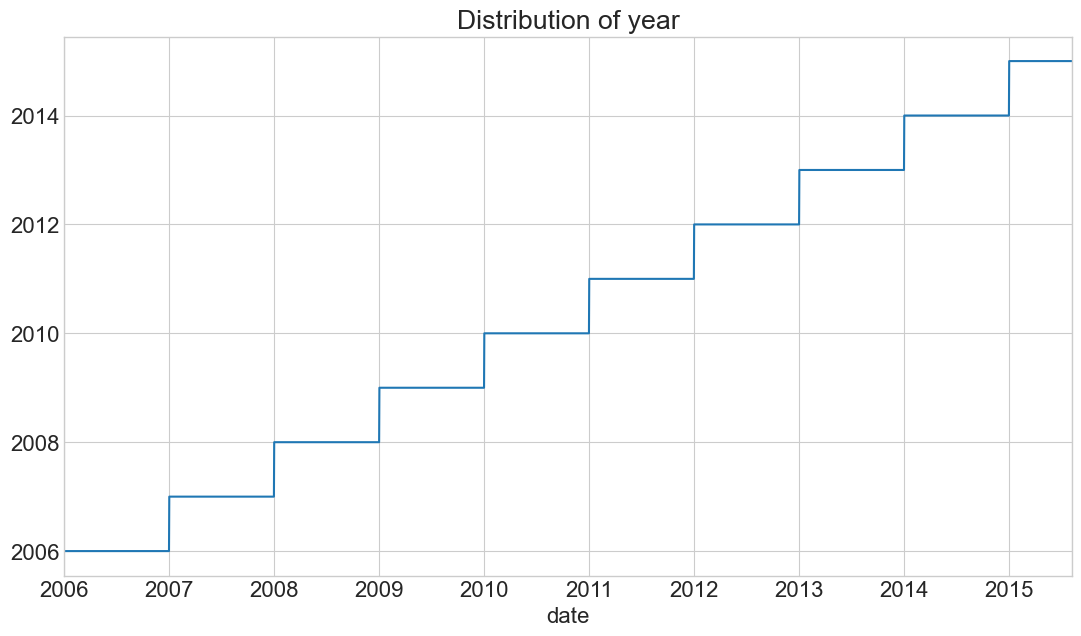

In [169]:
p.plot_distributions(train_ger)

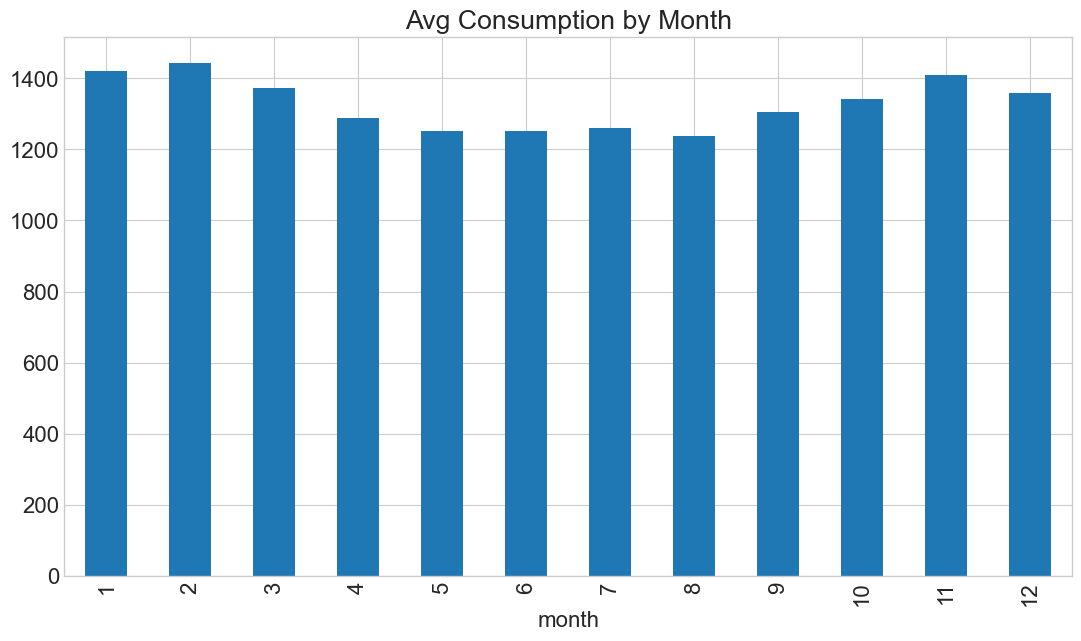

In [178]:
train_ger.groupby(train_ger.index.month).consumption.mean(
).plot.bar(title='Avg Consumption by Month', xlabel='month');

In [179]:
y = train_ger.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,1069.184000,NaN,-42.809359,NaN
2006-01-08,1381.300143,NaN,-146.409686,NaN
2006-01-15,1486.730286,NaN,-2.736513,NaN
2006-01-22,1490.031143,NaN,103.817819,NaN
2006-01-29,1514.176857,NaN,126.395454,NaN


<AxesSubplot:xlabel='date'>

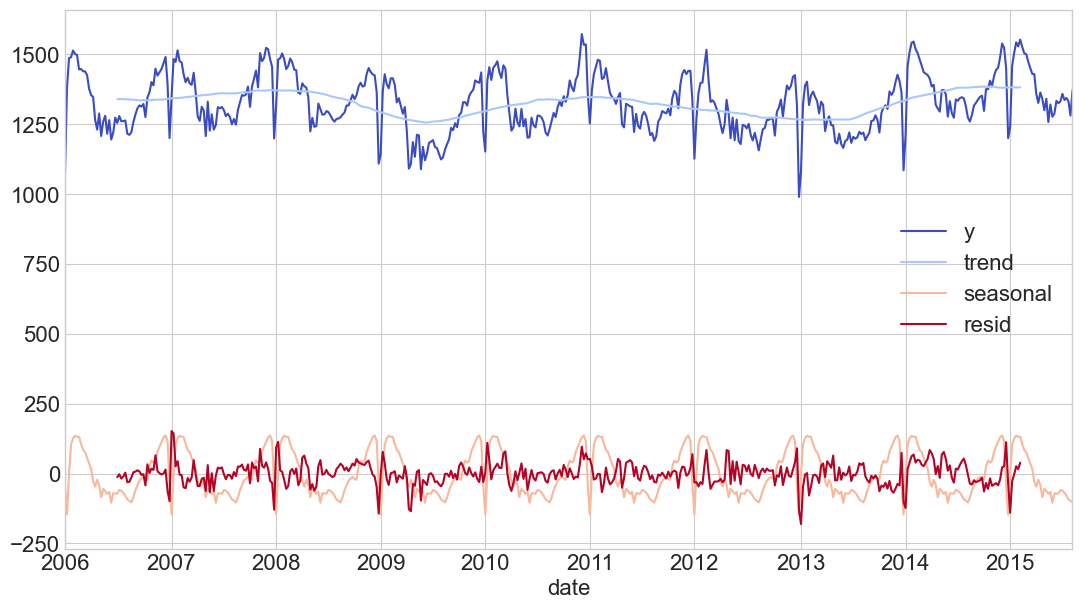

In [186]:
decomposition.plot(cmap='coolwarm')

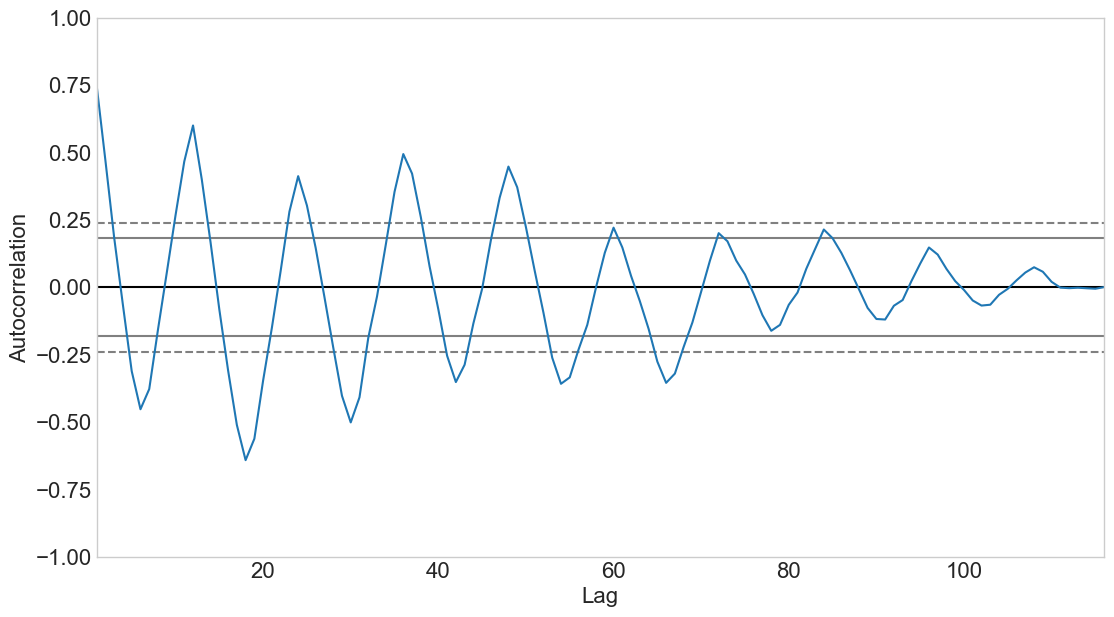

In [190]:
pd.plotting.autocorrelation_plot(train_ger.consumption.resample('M').mean());

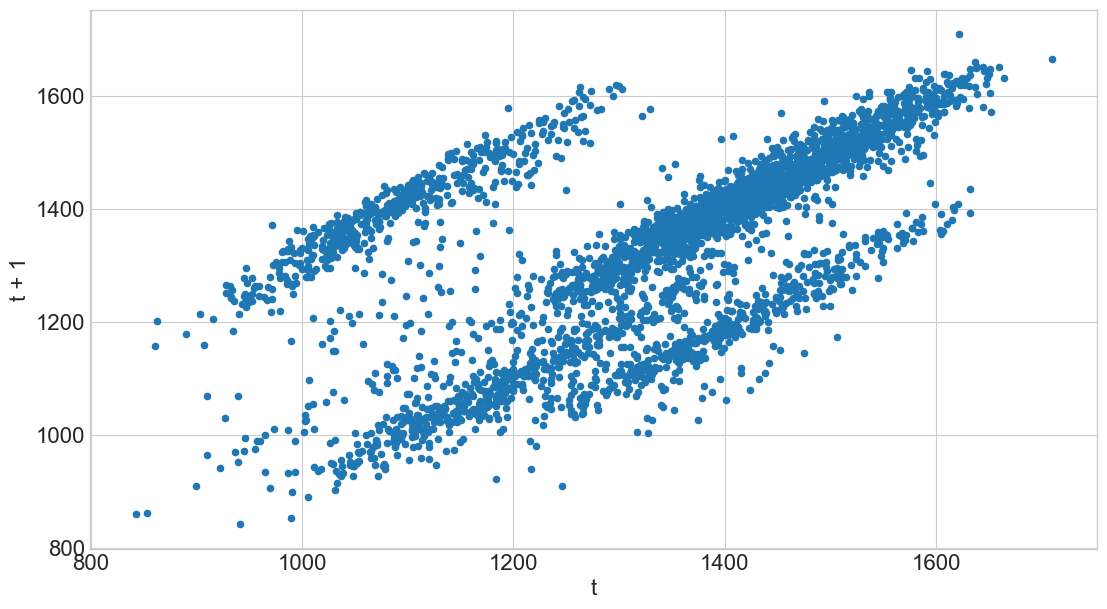

In [192]:
train_ger['y(t + 1)'] = train_ger.consumption.shift(-1)
ax = train_ger.plot.scatter(x='consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1');

,this_week,wind,solar,wind+solar,year,y(t + 1),the_next_week
date,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1380.521000,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1402.557571,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1491.646714,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1490.881571,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1512.038429,1501.403286
...,...,...,...,...,...,...,...
2015-07-12,1336.907714,216.580571,167.976000,384.556571,2015.0,1334.019143,1344.087714
2015-07-19,1344.087714,115.332571,136.608857,251.941429,2015.0,1343.722429,1332.267000
2015-07-26,1332.267000,183.971000,156.982143,340.953143,2015.0,1325.855571,1281.094429


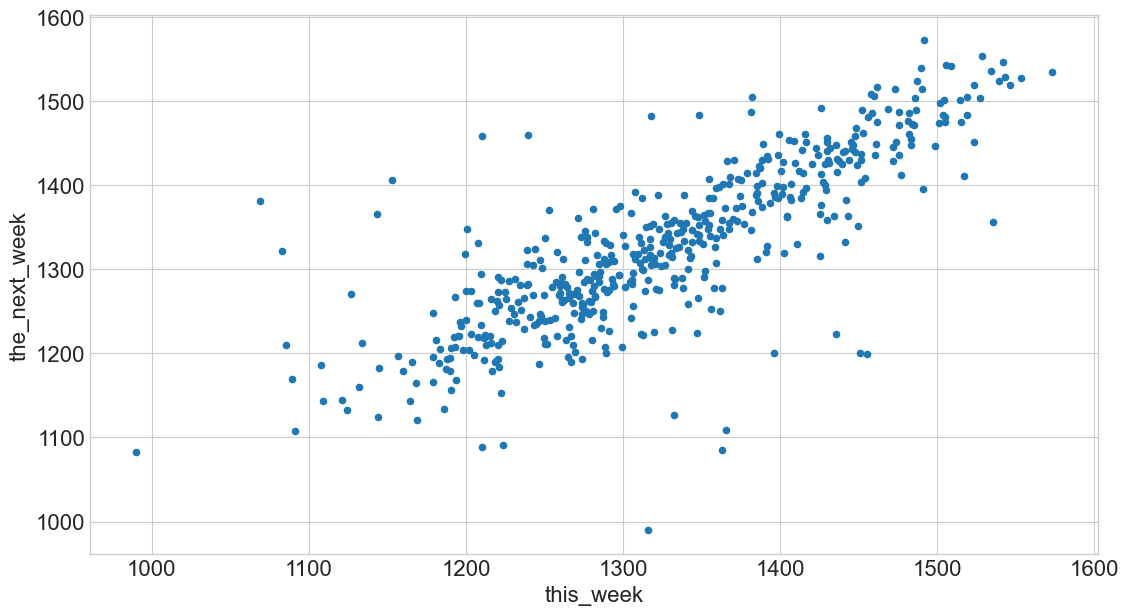

In [193]:
weekly = train_ger.resample('W').mean()
weekly['the_next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,wind,solar,wind+solar,year,y(t + 1),half_a_year_later
date,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1380.521000,1254.896857
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1402.557571,1279.510571
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1491.646714,1260.945286
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1490.881571,1261.179714
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1512.038429,1263.756571
...,...,...,...,...,...,...,...
2015-07-12,1336.907714,216.580571,167.976000,384.556571,2015.0,1334.019143,NaN
2015-07-19,1344.087714,115.332571,136.608857,251.941429,2015.0,1343.722429,NaN
2015-07-26,1332.267000,183.971000,156.982143,340.953143,2015.0,1325.855571,NaN


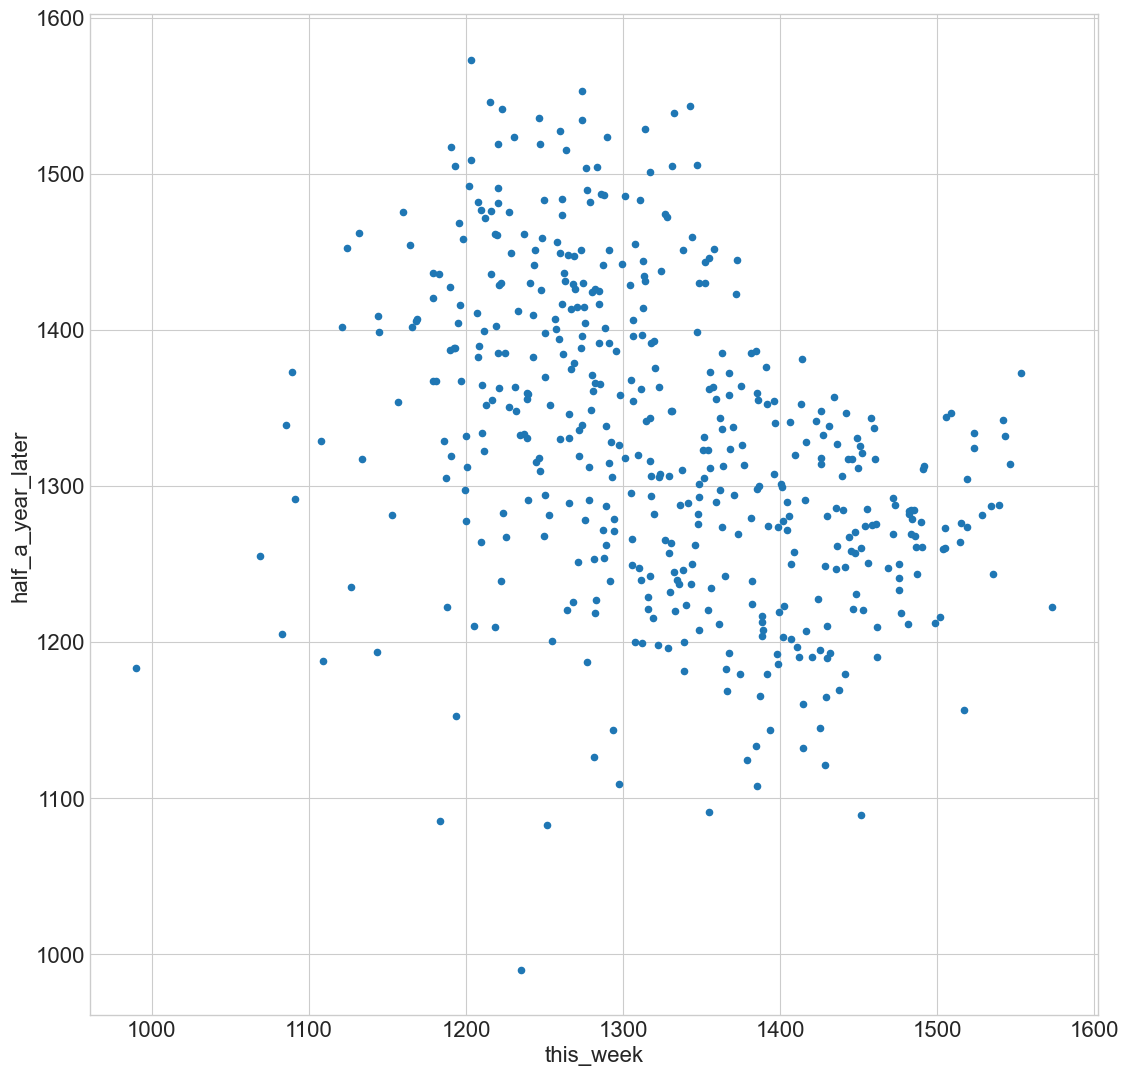

In [194]:
weekly = train_ger.resample('W').mean()
weekly['half_a_year_later'] = weekly.consumption.shift(-26)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly